In [1]:
import os
import pathlib
import datetime
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

np.set_printoptions(precision=4)

In [3]:
!pip install yfinance
import yfinance as yf

     |████████████████████████████████| 5.5MB 6.4MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22618 sha256=ec2860786f63ccc9116e8b1c25cc4147cb8c543c858523cae66fb7a244f12c02
  Stored in directory: /root/.cache/pip/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [4]:
data = yf.download("^GSPC",interval='1d',auto_adjust=True)

[*********************100%***********************]  1 of 1 completed


In [5]:

df= data.drop(columns=['Volume']).apply(np.log2)

In [6]:
date_time=pd.to_datetime(df.index,infer_datetime_format=True)
date_time

DatetimeIndex(['1927-12-30', '1928-01-03', '1928-01-04', '1928-01-05',
               '1928-01-06', '1928-01-09', '1928-01-10', '1928-01-11',
               '1928-01-12', '1928-01-13',
               ...
               '2020-11-11', '2020-11-12', '2020-11-13', '2020-11-16',
               '2020-11-17', '2020-11-18', '2020-11-19', '2020-11-20',
               '2020-11-23', '2020-11-24'],
              dtype='datetime64[ns]', name='Date', length=23337, freq=None)

In [9]:
date_time.size
a=np.arange(0,date_time.size*4,4)
b=np.random.randint(1,3,size=(date_time.size))
c = 3 - b
b += a
c += a
d = a +3
a,b,c,d


(array([    0,     4,     8, ..., 93336, 93340, 93344]),
 array([    2,     5,    10, ..., 93337, 93342, 93346]),
 array([    1,     6,     9, ..., 93338, 93341, 93345]),
 array([    3,     7,    11, ..., 93339, 93343, 93347]))

In [10]:
df['Open']
#pd.Series(df['Open'],index=a)
df['io']=a
df['ih']=b
df['il']=c
df['ic']=d
df[['io','Open']].values
kk=pd.DataFrame(data=df['Open'].values,index=df['io'].values,  columns=['val'] )
kk=kk.append(pd.DataFrame(data=df['High'].values,index=df['ih'].values,  columns=['val'] ),sort=True)
kk=kk.append(pd.DataFrame(data=df['Low'].values,index=df['il'].values, columns=['val'] ),sort=True)
kk=kk.append(pd.DataFrame(data=df['Close'].values,index=df['ic'].values, columns=['val'] ),sort=True)

In [11]:
df
kk

,val
0,4.142413
4,4.150560
8,4.147307
12,4.133399
16,4.142413
...,...
93331,11.800815
93335,11.806497
93339,11.796664
93343,11.804772


In [12]:
kk.sort_index(inplace=True)
(kk*0).sort_index()
kk

,val
0,4.142413
1,4.142413
2,4.142413
3,4.142413
4,4.150560
...,...
93343,11.804772
93344,11.811583
93345,11.811583
93346,11.830638


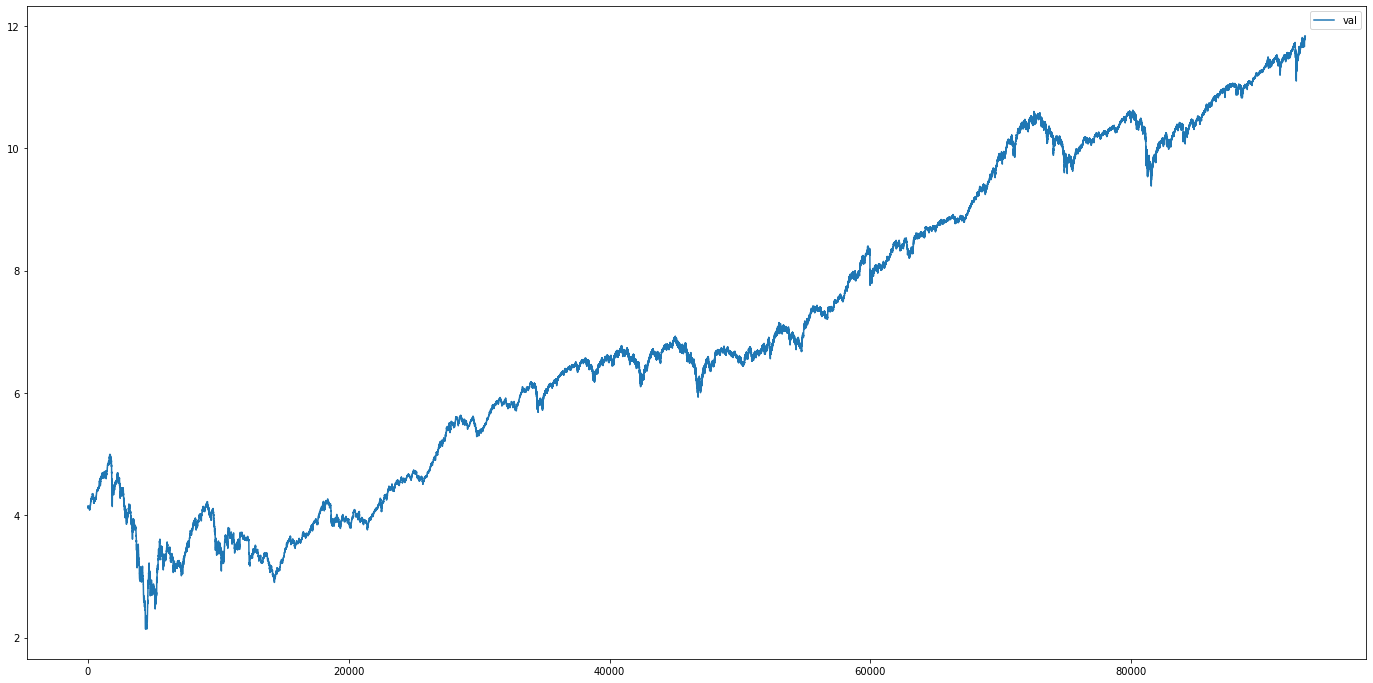

In [15]:
kk.plot(figsize=(24,12))